In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score
from decimal import Decimal

In [2]:
df = pd.read_csv('E:/Data Science/Projects/KNN Classification/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df.iloc[:,0:8]
y = df.iloc[:, 8]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [4]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [6]:
X_train.shape

(614, 8)

In [7]:
X_test.shape

(154, 8)

In [8]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
model.score(X_test,y_test)

0.6623376623376623

In [10]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[70, 29],
       [23, 32]], dtype=int64)

## Cross Validation

### Simple cross validation 

In [11]:
X_tr, X_cv, y_tr, y_cv = train_test_split(X_train, y_train, test_size=0.3)

for i in range(1,30,2):
    # Initiating the model to learn from range 1 to 30 on every odd number 
    knn = KNeighborsClassifier(n_neighbors=i)
    
    #Fitting model on coss validation train
    knn.fit(X_tr, y_tr)
    
    #predicting the response on cross validation train
    pred = knn.predict(X_cv)
    
    #evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize= True) * float(100)
    print("CV accuracy for k = {} is {} %".format(i,round(acc,2)))

CV accuracy for k = 1 is 70.27 %
CV accuracy for k = 3 is 69.19 %
CV accuracy for k = 5 is 71.35 %
CV accuracy for k = 7 is 70.27 %
CV accuracy for k = 9 is 73.51 %
CV accuracy for k = 11 is 71.35 %
CV accuracy for k = 13 is 74.59 %
CV accuracy for k = 15 is 75.14 %
CV accuracy for k = 17 is 73.51 %
CV accuracy for k = 19 is 70.81 %
CV accuracy for k = 21 is 71.89 %
CV accuracy for k = 23 is 74.05 %
CV accuracy for k = 25 is 71.89 %
CV accuracy for k = 27 is 71.35 %
CV accuracy for k = 29 is 70.81 %


In [12]:
knn = KNeighborsClassifier(3)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize= True) * float(100)
print("Test Accuracy for k = 3 is {} %".format(round(acc,2))) 

Test Accuracy for k = 3 is 66.88 %


### 10 fold cross validation 

In [13]:
# creating a list of K neighbours
myList = list(range(1,50))
neighbours = list(filter(lambda x: x % 2 !=0, myList))

# empty list that will hold cv values
cv_scores = []

#perform 10 fold cross validation
for k in neighbours:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(round(scores.mean(),2))

# changing to misclassification error
MSE = [1-x for x in cv_scores]

# determining the best k
optimal_k = neighbours[MSE.index(min(MSE))]
print('The cv score are {}\n'.format(cv_scores))

print('The optimal number of neighbour is {}'.format(optimal_k))

The cv score are [0.68, 0.71, 0.72, 0.72, 0.74, 0.74, 0.74, 0.73, 0.72, 0.73, 0.72, 0.72, 0.71, 0.72, 0.72, 0.73, 0.73, 0.72, 0.72, 0.73, 0.73, 0.72, 0.72, 0.72, 0.72]

The optimal number of neighbour is 9


### Plotting Misclassification error vs k

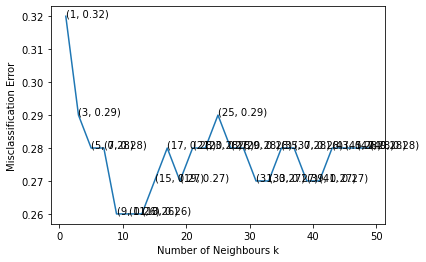

The misclassification error for k value is :  [0.32 0.29 0.28 0.28 0.26 0.26 0.26 0.27 0.28 0.27 0.28 0.28 0.29 0.28
 0.28 0.27 0.27 0.28 0.28 0.27 0.27 0.28 0.28 0.28 0.28]


In [14]:
plt.plot(neighbours,MSE)

for xy in zip(neighbours, np.round(MSE,3)):
    plt.annotate('(%s, %s)' %xy, xy=xy, textcoords = 'data')
    
plt.xlabel('Number of Neighbours k')
plt.ylabel('Misclassification Error')
plt.show()

print('The misclassification error for k value is : ', np.round(MSE,3))